In [ ]:

!pip install pandas scikit-learn-extra

In [29]:
import pandas as pd
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [33]:
df = pd.read_csv('Financial Distress.csv')

In [36]:
X = df.iloc[:, 1:]

In [42]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [51]:
kmedoids = KMedoids(n_clusters=5, random_state=0)
clusters = kmedoids.fit_predict(df_scaled)

In [44]:

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

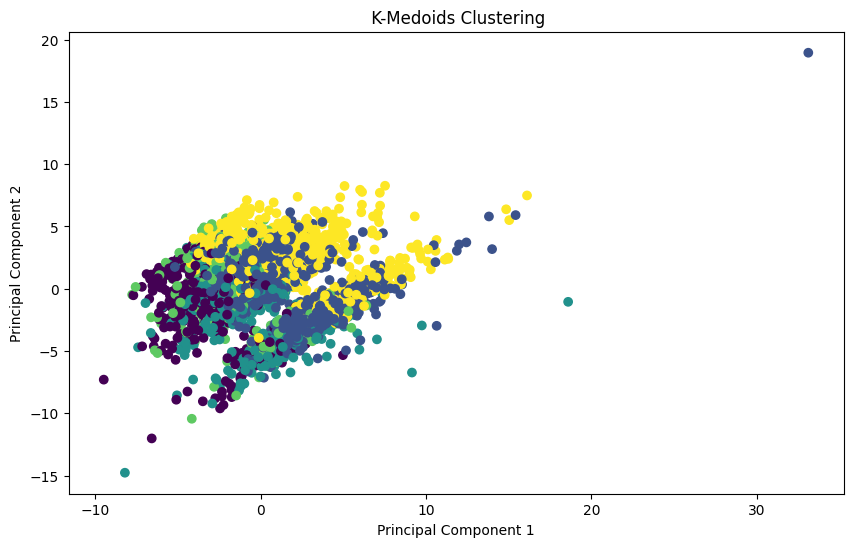

In [54]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', label=clusters)
plt.title(' K-Medoids Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [46]:

def calculate_sse(data, centers, labels):
    sse = 0
    for i in range(len(data)):
        center = centers[labels[i]]
        sse += np.sum((data[i] - center) ** 2)
    return sse

In [47]:

cluster_centers = kmedoids.cluster_centers_

In [48]:

sse = calculate_sse(df_scaled, cluster_centers, clusters)
print('Sum of Squared Errors (SSE):', sse)

Sum of Squared Errors (SSE): 331520.5097939764
